<a href="https://colab.research.google.com/github/Kaneezfatma02/Assignment_03/blob/main/capm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
NIFTY=yf.Ticker('^NSEI')

In [ ]:
KOTAKBANK=yf.Ticker('KOTAKBANK.NS')

In [ ]:
NIFTY_d=NIFTY.history(period='10y',auto_adjust="True")['Close']
KOTAKBANK_d=KOTAKBANK.history(period='10y',auto_adjust="True")['Close']

In [ ]:
NIFTY_m=NIFTY_d.resample('1M').last()
KOTAKBANK_m=KOTAKBANK_d.resample('1M').last()

In [ ]:
NIFTY_mr=NIFTY_m.pct_change().dropna()
KOTAKBANK_mr=KOTAKBANK_m.pct_change().dropna()

In [ ]:
import pandas as pd

In [ ]:
NK_dt=pd.merge(NIFTY_mr,KOTAKBANK_mr,on='Date')
NK_dt.head()

,Close_x,Close_y
Date,,
2012-08-31,0.005642,0.071582
2012-09-30,0.084587,0.130030
2012-10-31,-0.014658,-0.069364
2012-11-30,0.046292,0.110476
2012-12-31,0.004294,-0.030427


In [ ]:
NK_dt.rename(columns={'Close_x':'NIFTY_mr','Close_y':'KOTAKBANK_mr'},inplace=True)

In [ ]:
NK_dt

,NIFTY_mr,KOTAKBANK_mr
Date,,
2012-08-31,0.005642,0.071582
2012-09-30,0.084587,0.130030
2012-10-31,-0.014658,-0.069364
2012-11-30,0.046292,0.110476
2012-12-31,0.004294,-0.030427
...,...,...
2022-03-31,0.039946,-0.048243
2022-04-30,-0.020739,0.021039
2022-05-31,-0.030288,0.031328


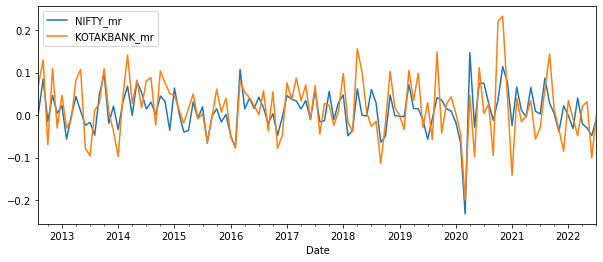

In [ ]:
NK_dt.plot(figsize=(10,4))

In [ ]:
train_dt=NK_dt[:-12].dropna()
test_dt=NK_dt[-12:].dropna()

In [ ]:
train_dt.head()

,NIFTY_mr,KOTAKBANK_mr
Date,,
2012-08-31,0.005642,0.071582
2012-09-30,0.084587,0.130030
2012-10-31,-0.014658,-0.069364
2012-11-30,0.046292,0.110476
2012-12-31,0.004294,-0.030427


Now we will use train data for analysis

first we will use adf test to check the stationarity of the data

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
print('NIFTY_mr')
adfuller(NK_dt.NIFTY_mr)[1]

NIFTY_mr


7.997810164416776e-21

In [ ]:
NIFTY_mr1=adfuller(NK_dt.NIFTY_mr.diff().dropna())[1]
NIFTY_mr1

6.350303636310824e-11

In [ ]:
print('KOTAKBANK_mr')
adfuller(NK_dt.KOTAKBANK_mr)[1]

KOTAKBANK_mr


7.893829860467937e-06

In [ ]:
KOTAKBANK_mr1=adfuller(NK_dt.KOTAKBANK_mr.diff().dropna())[1]
KOTAKBANK_mr1

1.788908002472091e-08

In [ ]:
train_dt1=train_dt.diff().dropna()
train_dt1.head()

,NIFTY_mr,KOTAKBANK_mr
Date,,
2012-09-30,0.078945,0.058448
2012-10-31,-0.099245,-0.199393
2012-11-30,0.060951,0.179840
2012-12-31,-0.041998,-0.140904
2013-01-31,0.017661,0.077039


In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
model=VAR(train_dt1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [ ]:
result=model.select_order(maxlags=12)

In [ ]:
print(result.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -10.54      -10.49   2.642e-05      -10.52
1       -11.03      -10.86   1.629e-05      -10.96
2       -11.12      -10.85   1.477e-05      -11.01
3       -11.34     -10.97*   1.186e-05      -11.19
4       -11.34      -10.86   1.186e-05      -11.15
5       -11.37      -10.77   1.161e-05      -11.13
6       -11.44      -10.74   1.076e-05      -11.16
7       -11.69      -10.89   8.402e-06      -11.37
8       -11.75      -10.83   7.987e-06     -11.38*
9       -11.78      -10.76   7.731e-06      -11.37
10     -11.81*      -10.68  7.575e-06*      -11.35
11      -11.73      -10.49   8.243e-06      -11.23
12      -11.69      -10.35   8.576e-06      -11.15
--------------------------------------------------


In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [ ]:
VARMAX_model=VARMAX(train_dt,order=(3,0),enforce_stationarity=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [ ]:
VARMAX_result=VARMAX_model.fit(disp=False)

In [ ]:
print(VARMAX_result.summary())

                                Statespace Model Results                                
Dep. Variable:     ['NIFTY_mr', 'KOTAKBANK_mr']   No. Observations:                  108
Model:                                   VAR(3)   Log Likelihood                 348.434
                                    + intercept   AIC                           -662.867
Date:                          Fri, 01 Jul 2022   BIC                           -617.271
Time:                                  08:51:05   HQIC                          -644.380
Sample:                              08-31-2012                                         
                                   - 07-31-2021                                         
Covariance Type:                            opg                                         
Ljung-Box (Q):                26.30, 24.13   Jarque-Bera (JB):         155.35, 2.96
Prob(Q):                        0.95, 0.98   Prob(JB):                   0.00, 0.23
Heteroskedasticity (H):        

In [ ]:
n_forecast=12
predict=VARMAX_result.get_prediction(start=len(train_dt),end=len(train_dt)+n_forecast-1)

In [ ]:
predictions=predict.predicted_mean

In [ ]:
predictions.columns=[['NIFTY_mr_Predicted','KOTAKBANK_mr_Predicted']]
predictions

,NIFTY_mr_Predicted,KOTAKBANK_mr_Predicted
2021-08-31,0.016832,0.033081
2021-09-30,0.020224,0.048334
2021-10-31,0.015182,0.032945
2021-11-30,0.009963,0.014004
2021-12-31,0.009120,0.010947
2022-01-31,0.010724,0.016576
2022-02-28,0.012185,0.021957
2022-03-31,0.012272,0.022315
2022-04-30,0.011709,0.020341
2022-05-31,0.011305,0.018850


In [ ]:
test_dt

,NIFTY_mr,KOTAKBANK_mr
Date,,
2021-08-31,0.086858,0.060292
2021-09-30,0.028365,0.143582
2021-10-31,0.003037,0.012790
2021-11-30,-0.038958,-0.034094
2021-12-31,0.021836,-0.084510
2022-01-31,-0.000818,0.034046
2022-02-28,-0.031485,-0.007807
2022-03-31,0.039946,-0.048243
2022-04-30,-0.020739,0.021039


In [ ]:
TvP=pd.concat([test_dt,predictions],axis=1)

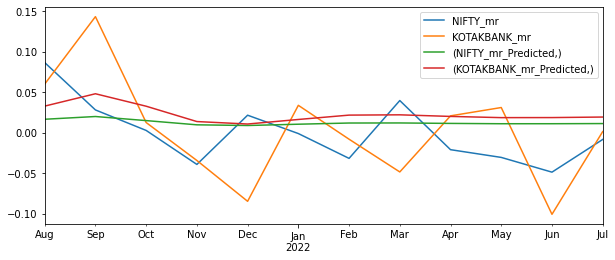

In [ ]:
TvP.plot(figsize=(10,4))